In [201]:
import re
from collections import Counter
import math
from matplotlib import pyplot as plt

读取中文语料并清洗

In [202]:
with open("data/rmrb.txt", 'r') as f:
    corpus = f.read()

corpus = re.sub("[^\u4e00-\u9fa5]+", '', corpus)  # 过滤非汉字内容
total_chars = len(corpus)
total_chars

30463770

在2M规模语料上计算汉字的概率和熵

In [203]:
def cal_entrophy(counter, num):
    entropy = 0

    # 计算每个字的概率和熵
    for _, count in counter.items():
        probability = count / num
        entropy -= probability * math.log2(probability)
    return entropy

In [204]:
mini_corpus = corpus[:2000000]
char_count = Counter(mini_corpus)
char_count

Counter({'烈': 389,
         '士': 523,
         '纪': 1243,
         '念': 1362,
         '日': 8035,
         '向': 3346,
         '人': 17468,
         '民': 13044,
         '英': 383,
         '雄': 308,
         '敬': 125,
         '献': 1019,
         '花': 692,
         '篮': 137,
         '仪': 240,
         '式': 3057,
         '在': 12425,
         '京': 1321,
         '隆': 111,
         '重': 5965,
         '举': 2878,
         '行': 7497,
         '习': 6775,
         '近': 7126,
         '平': 9404,
         '李': 1010,
         '克': 2140,
         '强': 7613,
         '栗': 163,
         '战': 4028,
         '书': 4264,
         '汪': 174,
         '洋': 573,
         '王': 848,
         '沪': 148,
         '宁': 606,
         '赵': 315,
         '乐': 568,
         '际': 2420,
         '韩': 274,
         '正': 2730,
         '岐': 50,
         '山': 2564,
         '出': 7917,
         '席': 1437,
         '本': 3557,
         '报': 2978,
         '北': 1914,
         '月': 7358,
         '电': 2373,
         '记': 495

In [208]:
sorted_char_count = dict(sorted(char_count.items(), key=lambda x: x[1], reverse=True))
for i, (x, y) in enumerate(sorted_char_count.items()):
    if i < 10:
        print(f"|{i+1}|{x} | {(y / total_chars):.6f}|")

|1|的 | 0.001606|
|2|国 | 0.001071|
|3|中 | 0.000989|
|4|大 | 0.000646|
|5|人 | 0.000573|
|6|发 | 0.000573|
|7|党 | 0.000538|
|8|一 | 0.000530|
|9|新 | 0.000527|
|10|全 | 0.000526|


In [206]:
cal_entrophy(char_count, 2000000)

9.34206766165239

In [209]:
entropy_list = []

for i in range(2000000, total_chars, 2000000):
    entropy = cal_entrophy(Counter(corpus[:i]) ,i)
    entropy_list.append(entropy)

In [178]:
entropy_list

[9.34206766165239,
 9.382282905598379,
 9.447642423387505,
 9.469972860370758,
 9.521465344949616,
 9.552519596762746,
 9.549254031504697,
 9.542406511915285,
 9.553518663125569,
 9.563228474119956,
 9.563781846275134,
 9.569357260144566,
 9.572729330782725,
 9.580943801976781,
 9.581830069487703]

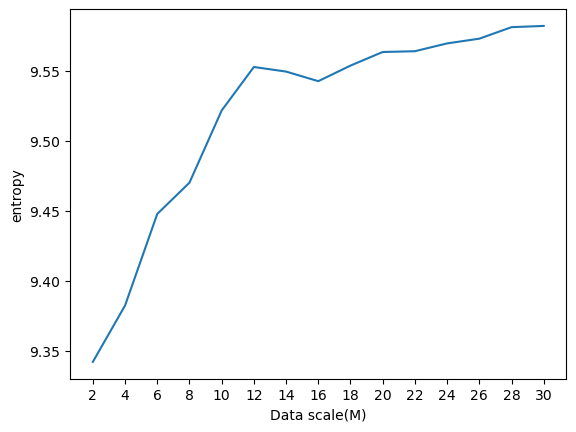

In [210]:
plt.plot([2*i for i in range(1, 16)],entropy_list)
plt.xticks([2*i for i in range(1, 16)])
plt.xlabel("Data scale(M)")
plt.ylabel("entropy")
plt.show()

验证齐夫定律

In [217]:
all_counter = Counter(corpus)
sorted_char_count = dict(sorted(all_counter.items(), key=lambda x: x[1], reverse=True))

for i, (x, y) in enumerate(sorted_char_count.items()):
    if i < 10:
        print(f"|{i+1}|{x} | {(y / total_chars):.6f}|")

|1|的 | 0.023056|
|2|国 | 0.012418|
|3|中 | 0.011122|
|4|一 | 0.008214|
|5|人 | 0.007562|
|6|发 | 0.007465|
|7|大 | 0.007313|
|8|和 | 0.007121|
|9|在 | 0.006480|
|10|业 | 0.006321|


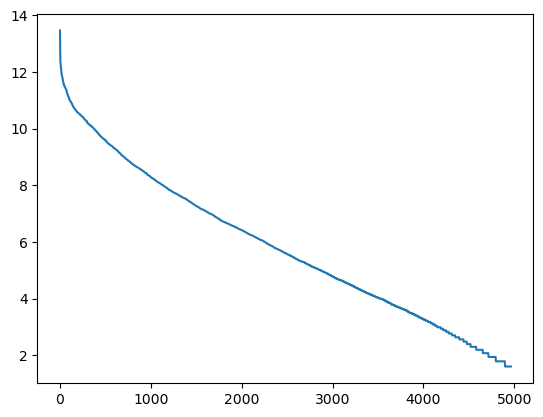

In [218]:
char_freq = [i for _, i in sorted_char_count.items()]

char_freq_log = [math.log(i) for i in char_freq]
plt.plot(char_freq_log[:-1000])
plt.show()

# 统计英文语料信息
读取英文语料并清洗

In [183]:
with open("data/china_daily.txt", 'r') as f1, open("data/global_times.txt", 'r') as f2:
    raw_english_corpus = f1.read()
    raw_english_corpus += f2.read()

eng_corpus = re.sub(r'[^a-zA-Z]', '', raw_english_corpus).lower()
total_eng_chars = len(eng_corpus)
total_eng_chars

19987245

在2M规模语料上计算字母的概率和熵

In [184]:
mini_eng_corpus = eng_corpus[:2000000]
eng_char_count = Counter(mini_eng_corpus)
eng_char_count

Counter({'s': 127187,
         'k': 10582,
         'o': 146135,
         'r': 120138,
         'e': 229354,
         'a': 173109,
         'n': 167813,
         'p': 46901,
         'i': 168645,
         't': 172882,
         'y': 29019,
         'l': 77876,
         'd': 73417,
         'u': 58907,
         'g': 47344,
         'j': 5294,
         'm': 48511,
         'c': 77905,
         'v': 23191,
         'w': 25227,
         'h': 91504,
         'x': 7241,
         'f': 40869,
         'b': 24259,
         'q': 2056,
         'z': 4634})

In [185]:
sorted_eng_char_count = dict(sorted(eng_char_count.items(), key=lambda x: x[1], reverse=True))
for i,(x, y) in enumerate(sorted_eng_char_count.items()):
    if i < 10:
        print(f'|{i+1}|{x}|{(y/2000000):.6f}|')

|1|e|0.114677|
|2|a|0.086555|
|3|t|0.086441|
|4|i|0.084322|
|5|n|0.083906|
|6|o|0.073067|
|7|s|0.063593|
|8|r|0.060069|
|9|h|0.045752|
|10|c|0.038953|


In [186]:
cal_entrophy(eng_char_count, 2000000)

4.177540071016238

计算熵随着英文文本规模增加的变化

In [211]:
entropy_list = []
for i in range(2000000, 20000001, 2000000):
    entropy = cal_entrophy(Counter(eng_corpus[:i]) ,i)
    entropy_list.append(entropy)

In [212]:
entropy_list

[4.177540071016238,
 4.1765262785874,
 4.176527430488102,
 4.176835662635126,
 4.176994375929282,
 4.177002165340783,
 4.177128469077472,
 4.177365975007119,
 4.176533525517015,
 4.1728036547059375]

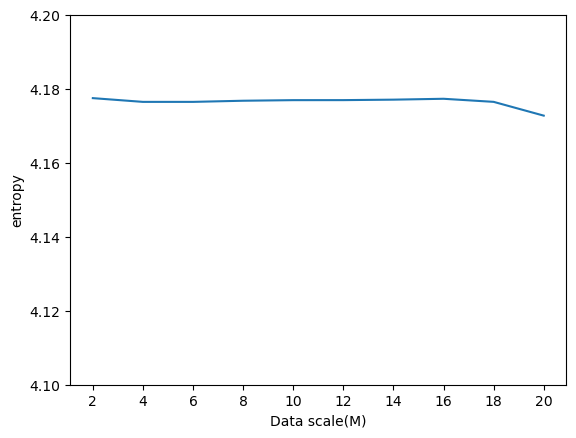

In [213]:
plt.plot([2*i for i in range(1, 11)], entropy_list)
plt.xticks([2*i for i in range(1, 11)])
plt.xlabel("Data scale(M)")
plt.ylabel("entropy")
plt.ylim(4.1, 4.2)  # 设置y轴范围
plt.show()

验证齐夫定律

In [190]:
import string
def count_words(text):
    # 去除标点符号并将文本转为小写
    text = text.translate(str.maketrans('', '', string.punctuation)).lower()
    # 分词
    words = text.split()
    # 统计单词出现次数
    word_counts = Counter(words)

    return word_counts, len(words)

In [214]:
# 统计单词出现次数
word_counts, num_word = count_words(raw_english_corpus)
sorted_word_count = dict(sorted(word_counts.items(), key=lambda x: x[1], reverse=True))

# 打印结果
for i, (word, count) in enumerate(sorted_word_count.items()):
    if i < 10:
        print(f"|{i+1}|{word}|{count}")

|1|the|256747
|2|of|133959
|3|and|133027
|4|to|92380
|5|in|92351
|6|a|68247
|7|for|33153
|8|on|32606
|9|is|30245
|10|china|28389


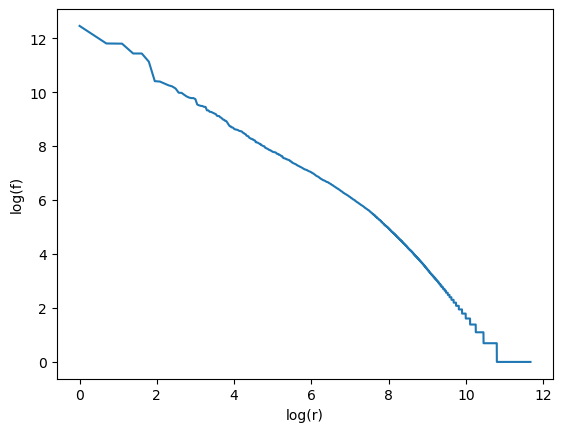

In [215]:
import numpy as np
word_freq = [i for _, i in sorted_word_count.items()]
log_data = np.log(word_freq)
log_index = np.log(range(1, len(word_freq) + 1))
# 设置坐标轴标签
plt.xlabel('Log(Index)')
plt.ylabel('Log(Data)')
# word_freq_log = [math.log(i) for i in word_freq]
plt.plot(log_index, log_data)
# 设置坐标轴标签
plt.xlabel('log(r)')
plt.ylabel('log(f)')
plt.show()